In [1]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.5.2


In [2]:
# General libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the dataset
file_path = r"C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Advanced Analytics & Dashboard Design\Cleaned Data\gun-violence-cleaned.csv"
data = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded
print(data.head())

   incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/4788

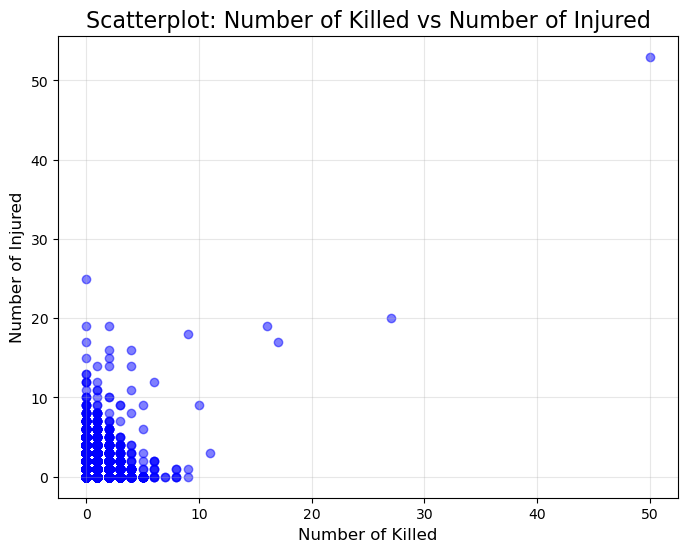

In [5]:
import matplotlib.pyplot as plt

# Scatterplot for number of killed vs number of injured
plt.figure(figsize=(8, 6))
plt.scatter(data['n_killed'], data['n_injured'], alpha=0.5, color='blue')
plt.title('Scatterplot: Number of Killed vs Number of Injured', fontsize=16)
plt.xlabel('Number of Killed', fontsize=12)
plt.ylabel('Number of Injured', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## **Hypotheses**

### **1. Relationship Between Fatalities and Injuries**
- **Hypothesis**: Incidents with higher numbers of fatalities result in fewer injuries due to the severity of the event.
- **Rationale**: The scatterplot suggests a weak negative relationship between the number of people killed and injured, with incidents involving many fatalities having fewer injured survivors.

### **2. Relationship Between Guns Involved and Casualties**
- **Hypothesis**: Incidents involving a higher number of guns result in more fatalities and injuries.
- **Rationale**: It is reasonable to expect that incidents involving multiple firearms have the potential to cause greater harm.

### **3. Geographic Patterns**
- **Hypothesis**: States with larger populations have higher numbers of incidents, fatalities, and injuries.
- **Rationale**: Population size directly influences the likelihood of incidents due to higher numbers of people and firearms.

### **4. Outlier Characteristics**
- **Hypothesis**: Outliers in the dataset (e.g., incidents with >40 fatalities) are mass shootings or events with specific characteristics such as higher numbers of guns involved or occurring in specific regions.
- **Rationale**: Extreme cases often represent unique circumstances or high-profile incidents.

---

### **Next Steps**
- Test these hypotheses using statistical methods (e.g., correlation, regression) and explore additional visualizations to validate the assumptions.


In [6]:
# Independent variable (X): Number of guns involved
X = data['n_guns_involved'].values.reshape(-1, 1)

# Dependent variable (y): Number of fatalities
y = data['n_killed'].values.reshape(-1, 1)

# Confirm the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (239677, 1)
Shape of y: (239677, 1)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (191741, 1)
X_test shape: (47936, 1)
y_train shape: (191741, 1)
y_test shape: (47936, 1)


In [8]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()


In [9]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Print the model's coefficients
print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficient: [[-0.00289828]]
Model Intercept: [0.25596515]


In [10]:
# Predict on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predictions:", y_pred[:5].flatten())


Predictions: [0.25306687 0.25306687 0.25306687 0.25306687 0.25306687]


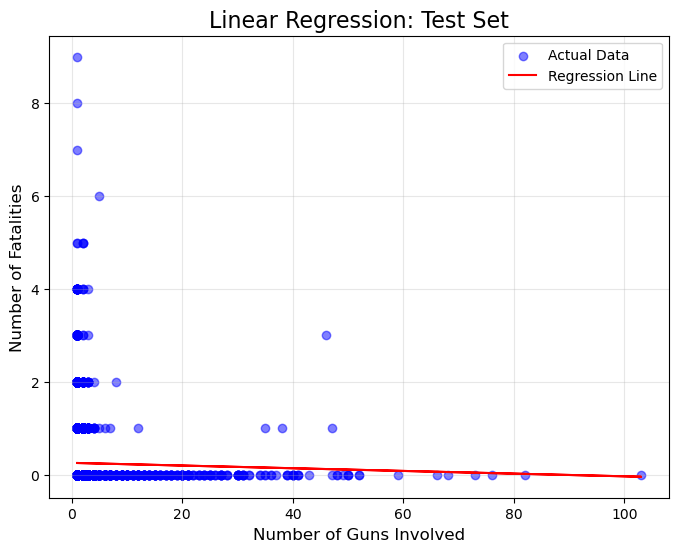

In [11]:
import matplotlib.pyplot as plt

# Create a scatterplot of the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and a legend
plt.title('Linear Regression: Test Set', fontsize=16)
plt.xlabel('Number of Guns Involved', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## **Interpretation of the Linear Regression Fit**

### **Observations**:
1. **Scatter Distribution**:
   - The majority of the actual data points (`X_test` vs. `y_test`) are clustered near the lower end of the axes (close to 0 for both variables).
   - This clustering reflects the right-skewed nature of the data, where most incidents involve fewer guns and fatalities.

2. **Regression Line**:
   - The red regression line shows a very minimal slope, indicating a weak or negligible linear relationship between the number of guns involved (`X`) and the number of fatalities (`y`).
   - The line mostly lies flat, failing to align with the variation in the data points.

3. **Outliers**:
   - There are noticeable outliers (e.g., incidents with higher fatalities or guns involved), which the regression line does not account for effectively.

### **Model Fit**:
- The linear regression model does not appear to fit the data well.
  - This is likely due to the weak correlation between the independent variable (`n_guns_involved`) and the dependent variable (`n_killed`).
  - The predominance of low values in both variables and the presence of outliers make a simple linear model unsuitable for capturing the underlying patterns.

---

### **Next Steps**:
1. **Alternative Models**:
   - Consider using more flexible models, such as **polynomial regression** or **non-linear methods**, to capture potential patterns.
2. **Feature Engineering**:
   - Include other variables (e.g., `incident_characteristics`, `participant_age_group`) to explore their contribution to the number of fatalities.
3. **Evaluate Model Metrics**:
   - Assess the model's performance using metrics such as **Mean Squared Error (MSE)** or **R² score** to quantify how well it explains the variability in the data.

Would you like to compute these performance metrics or explore alternative models next? 🚀


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.2554955348542919
R² Score: 0.0006048017533158978


In [13]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})

# Display the first few rows of the DataFrame
print(comparison_df.head())


   Actual  Predicted
0       0   0.253067
1       1   0.253067
2       0   0.253067
3       0   0.253067
4       1   0.253067


## **Model Performance on the Test Set**

### **Observations**:
1. **Predicted Values**:
   - The predicted values (`y_pred`) are almost constant at around **0.253**, showing little variation regardless of the input (`n_guns_involved`).
   - This indicates that the model struggles to explain the variability in the actual data (`y_test`).

2. **Actual Values**:
   - The actual values (`y_test`) vary significantly, including zeros, ones, and higher values for fatalities.
   - The lack of alignment between `y_test` and `y_pred` reflects the poor performance of the linear regression model.

3. **Model Metrics**:
   - **R² Score**: ~0.0006 indicates the model explains almost none of the variance in the data.
   - **MSE**: ~0.255 suggests that the model predictions are, on average, significantly different from the actual values.

---

### **Reflections on Data Bias**
1. **Highly Skewed Data**:
   - The dataset is heavily skewed toward incidents with zero or very low fatalities, leading the model to predict values close to the mean of the target variable (`n_killed`).
   - This limits the ability of linear regression to capture meaningful relationships.

2. **Outliers**:
   - Incidents with high fatalities (outliers) are not accounted for effectively by the model, further reducing its accuracy.

3. **Potential Data Bias**:
   - The lack of additional predictors, such as incident characteristics, location details, or participant demographics, could lead to biased predictions.
   - The focus solely on `n_guns_involved` as the independent variable might oversimplify the factors influencing fatalities.

---

### **Next Steps for Improvement**:
1. **Feature Engineering**:
   - Include other variables like `incident_characteristics` or `participant_age
